In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from plot_metric.functions import BinaryClassification
from sklearn.metrics import accuracy_score, precision_score, f1_score,roc_curve, auc

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data_final.csv')

### Train and Test data

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
Y = data['target'].astype(int)
X = data.drop('target',axis=1)
X_train,X_test, y_train, y_test = train_test_split(X,Y)

In [5]:
y_total = list(y_train) + list(y_test)
y_categorical = to_categorical(y_total)
y_train_dl = y_categorical[:len(y_train)]
y_test_dl = y_categorical[len(y_train):]

### Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier 

In [7]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred)
precision_rf = precision_score(y_test,y_pred)
f1_rf = f1_score(y_test,y_pred)
roc_rf = roc_curve(y_test,y_pred)

/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


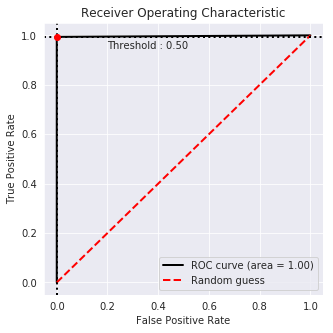

In [8]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Support Vector Classifier

In [9]:
from sklearn.svm import SVC

In [10]:
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy_svm= accuracy_score(y_test,y_pred)
precision_svm = precision_score(y_test,y_pred)
f1_svm = f1_score(y_test,y_pred)
roc_svm = roc_curve(y_test,y_pred)

/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


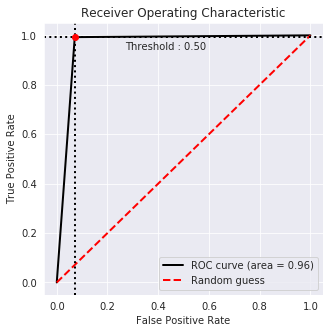

In [11]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy_lr= accuracy_score(y_test,y_pred)
precision_lr = precision_score(y_test,y_pred)
f1_lr = f1_score(y_test,y_pred)
roc_lr = roc_curve(y_test,y_pred)

/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


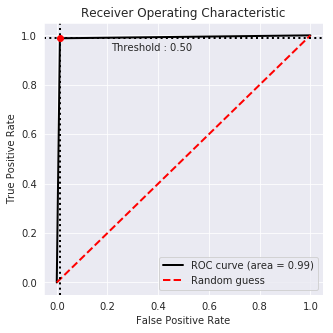

In [14]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Multilayer Perceptron

In [15]:
from keras.models import Sequential
from keras.layers import Dense


# Build the model.
model = Sequential([
  Dense(12, activation='relu', input_shape=(X.shape[1],)),
  Dense(6, activation='relu'),
  Dense(2, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
print(model.summary())

# Train the model.
model.fit(
  X_train,
  to_categorical(y_train),
  epochs=10,
  batch_size=32,
)

# Evaluate the model.
score = model.evaluate(
  X_test,
  to_categorical(y_test)
)

y_pred_dl = model.predict(X_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/10
18647/18647 [==============================] - 2s 82us/step - loss: 0.5300 - accuracy: 0.8787
Epoch 2/10
18647/18647 [==============================] - 1s 47us/step - loss: 0.2577 - accuracy: 0.9241
Epoch 3/10
18647/18647 [==============================] - 1s 47us/step - loss: 0.2146 - a

In [16]:
y_pred_mlp = np.argmax(y_pred_dl,axis=1)
accuracy_mlp= accuracy_score(y_test,y_pred)
precision_mlp = precision_score(y_test,y_pred)
f1_mlp = f1_score(y_test,y_pred)
roc_mlp = roc_curve(y_test,y_pred)

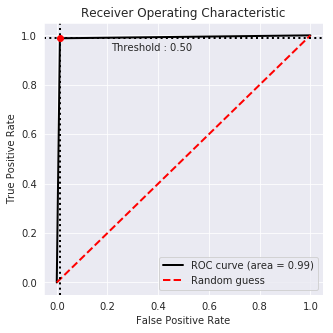

In [17]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Convolutional Neural Network

In [18]:
X_train_DL = X_train.values.reshape((-1,1,7))
X_test_DL = X_test.values.reshape((-1,1,7))

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling2D
from keras import backend as K

batch_size = 10
num_classes = 2
epochs = 10

input_shape = (1, 7)
model = Sequential()
model.add(Conv1D(12, kernel_size=(1),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv1D(10, (1), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

model.fit(X_train_DL, to_categorical(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          )
score = model.evaluate(X_test_DL, to_categorical(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_dl = model.predict(X_test_DL)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 12)             96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 10)             130       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 77        
_________________________________________________________________
dropout_2 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [20]:
y_pred = np.argmax(y_pred_dl,axis=1)
accuracy_cnn= accuracy_score(y_test,y_pred)
precision_cnn = precision_score(y_test,y_pred)
f1_cnn = f1_score(y_test,y_pred)
roc_cnn = roc_curve(y_test,y_pred)

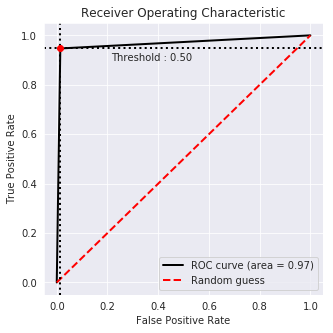

In [21]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Recurrent Neural Network

In [23]:
from keras.layers import GRU, SimpleRNN, Dense

epochs = 10

model1 = Sequential()

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 15)
model1.add(GRU(15, return_sequences=True))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 15)
model1.add(GRU(15, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 12)
model1.add(SimpleRNN(12))

model1.add(Dense(2, activation='softmax'))
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model1.fit(X_train_DL, to_categorical(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
print(model1.summary())

score = model1.evaluate(X_test_DL, to_categorical(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_dl = model1.predict(X_test_DL)

Epoch 1/10
18647/18647 [==============================] - 11s 578us/step - loss: 0.1917 - accuracy: 0.9237
Epoch 2/10
18647/18647 [==============================] - 8s 442us/step - loss: 0.1174 - accuracy: 0.9536
Epoch 3/10
18647/18647 [==============================] - 9s 497us/step - loss: 0.1049 - accuracy: 0.9580
Epoch 4/10
18647/18647 [==============================] - 8s 451us/step - loss: 0.0981 - accuracy: 0.9623
Epoch 5/10
18647/18647 [==============================] - 9s 460us/step - loss: 0.0931 - accuracy: 0.9608
Epoch 6/10
18647/18647 [==============================] - 8s 432us/step - loss: 0.0867 - accuracy: 0.9659
Epoch 7/10
18647/18647 [==============================] - 8s 454us/step - loss: 0.0826 - accuracy: 0.9678
Epoch 8/10
18647/18647 [==============================] - 8s 436us/step - loss: 0.0795 - accuracy: 0.9681
Epoch 9/10
18647/18647 [==============================] - 9s 456us/step - loss: 0.0767 - accuracy: 0.9698
Epoch 10/10
18647/18647 [====================

In [24]:
y_pred = np.argmax(y_pred_dl,axis=1)
accuracy_rnn= accuracy_score(y_test,y_pred)
precision_rnn = precision_score(y_test,y_pred)
f1_rnn = f1_score(y_test,y_pred)
roc_rnn = roc_curve(y_test,y_pred)

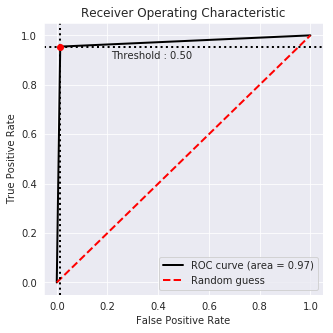

In [25]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [26]:
#metric values for random forest
accuracy_rf, precision_rf, f1_rf 

(0.9972651222651223, 1.0, 0.9969451931716082)

In [27]:
#metric values for SVM
accuracy_svm, precision_svm, f1_svm

(0.9576898326898327, 0.9193762441937624, 0.9546942291128336)

In [32]:
#metric values for logistic regression
accuracy_lr, precision_lr, f1_lr

(0.9877734877734877, 0.9846483398786148, 0.986409155937053)

In [33]:
#metric values for MLP
accuracy_mlp, precision_mlp, f1_mlp 

(0.9877734877734877, 0.9846483398786148, 0.986409155937053)

In [34]:
#metric values for CNN
accuracy_cnn, precision_cnn, f1_cnn

(0.9684684684684685, 0.9821627647714605, 0.9642466253192266)

In [35]:
#metric values for RNN
accuracy_rnn, precision_rnn, f1_rnn 

(0.972007722007722, 0.982663223902619, 0.9683751363140677)

In [36]:
roc_rf, roc_svm, roc_lr, roc_mlp, roc_cnn, roc_rnn

((array([0., 0., 1.]),
  array([0.        , 0.99390899, 1.        ]),
  array([2, 1, 0])),
 (array([0.        , 0.07094891, 1.        ]),
  array([0.        , 0.99283411, 1.        ]),
  array([2, 1, 0])),
 (array([0.        , 0.01255474, 1.        ]),
  array([0.        , 0.98817628, 1.        ]),
  array([2, 1, 0])),
 (array([0.        , 0.01255474, 1.        ]),
  array([0.        , 0.98817628, 1.        ]),
  array([2, 1, 0])),
 (array([0.       , 0.0140146, 1.       ]),
  array([0.        , 0.94697241, 1.        ]),
  array([2, 1, 0])),
 (array([0.        , 0.01372263, 1.        ]),
  array([0.       , 0.9544966, 1.       ]),
  array([2, 1, 0])))